In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
import matplotlib.pyplot as plt

In [19]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [20]:
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [21]:
model = Sequential([
    Flatten(input_shape = (32, 32, 3)),  
    Dense(512, activation='relu'), 
    Dense(10, activation='softmax')  
])

c:\Python313\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,578,506 (6.02 MB)

 Trainable params: 1,578,506 (6.02 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_data=(x_test, y_test))
history

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.3343 - loss: 1.9016 - val_accuracy: 0.4082 - val_loss: 1.7084
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.3936 - loss: 1.7031 - val_accuracy: 0.4002 - val_loss: 1.7024
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4234 - loss: 1.6293 - val_accuracy: 0.4274 - val_loss: 1.6114
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.4444 - loss: 1.5779 - val_accuracy: 0.4375 - val_loss: 1.5811
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4525 - loss: 1.5485 - val_accuracy: 0.4520 - val_loss: 1.5467
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4618 - loss: 1.5211 - val_accuracy: 0.4456 - val_loss: 1.5753
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4715 - loss: 1.4960 - val_accuracy: 0.4609 - val_loss: 1.5206
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.4771 - loss: 1.4748 - val_accuracy

In [25]:
dropout_model = Sequential([
    Flatten(input_shape = (32, 32, 3)),  
    Dense(512, activation='relu'), 
    Dropout(0.5),
    Dense(10, activation='softmax')
])

dropout_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [26]:
history_dropout = dropout_model.fit(x_train, y_train, 
                                     validation_data=(x_test, y_test), 
                                     epochs=50, 
                                     batch_size=64)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.2378 - loss: 2.0737 - val_accuracy: 0.3281 - val_loss: 1.8820
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2709 - loss: 1.9725 - val_accuracy: 0.3510 - val_loss: 1.8261
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2804 - loss: 1.9452 - val_accuracy: 0.3555 - val_loss: 1.8211
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.2920 - loss: 1.9269 - val_accuracy: 0.3706 - val_loss: 1.7910
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2977 - loss: 1.9143 - val_accuracy: 0.3630 - val_loss: 1.7759
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.2999 - loss: 1.9043 - val_accuracy: 0.3732 - val_loss: 1.7702
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3020 - loss: 1.8956 - val_accuracy: 0.3681 - val_loss: 1.7504
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.3043 - loss: 1.8913 - 

In [31]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

early_stopping_model = model
history_early_stopping = early_stopping_model.fit(x_train, y_train, 
                                                  validation_data=(x_test, y_test), 
                                                  epochs=50, 
                                                  batch_size=64, 
                                                  callbacks=[early_stopping])

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5794 - loss: 1.1797 - val_accuracy: 0.4941 - val_loss: 1.4799
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5793 - loss: 1.1825 - val_accuracy: 0.4975 - val_loss: 1.4622
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.5802 - loss: 1.1793 - val_accuracy: 0.4905 - val_loss: 1.4654
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.5806 - loss: 1.1733 - val_accuracy: 0.4929 - val_loss: 1.4886
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.5819 - loss: 1.1727 - val_accuracy: 0.4953 - val_loss: 1.4749
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5843 - loss: 1.1665 - val_accuracy: 0.4905 - val_loss: 1.4776
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5845 - loss: 1.1630 - val_accuracy: 0.4939 - val_loss: 1.4758


In [32]:
l2_model = Sequential([
    Flatten(input_shape = (32, 32, 3)),  
    Dense(512, activation='relu', kernel_regularizer=l2(0.01)), 
    Dense(10, activation='softmax')
])

l2_model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
l2_model = l2_model
history_l2 = l2_model.fit(x_train, y_train, 
                           validation_data=(x_test, y_test), 
                           epochs=50, 
                           batch_size=64)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.2971 - loss: 2.8018 - val_accuracy: 0.3293 - val_loss: 1.9507
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3298 - loss: 1.9570 - val_accuracy: 0.3456 - val_loss: 1.9443
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3410 - loss: 1.9296 - val_accuracy: 0.3190 - val_loss: 1.9366
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3487 - loss: 1.9057 - val_accuracy: 0.3574 - val_loss: 1.8825
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.3542 - loss: 1.8895 - val_accuracy: 0.3139 - val_loss: 1.9671
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3537 - loss: 1.8842 - val_accuracy: 0.3660 - val_loss: 1.8627
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.3622 - loss: 1.8608 - val_accuracy: 0.3270 - val_loss: 1.9394
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.3647 - loss: 1.8570 - val_accu

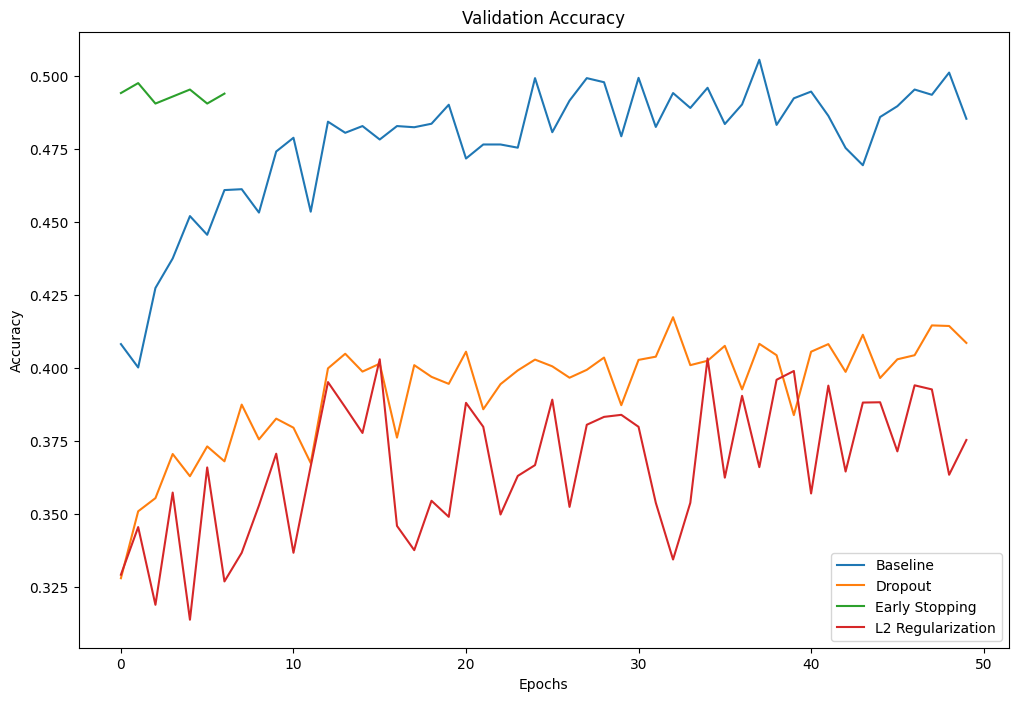

In [34]:
def plot_history(histories, labels):
    plt.figure(figsize=(12, 8))
    for i, history in enumerate(histories):
        plt.plot(history.history['val_accuracy'], label=labels[i])
    plt.title('Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_history([history, history_dropout, history_early_stopping, history_l2], 
             ['Baseline', 'Dropout', 'Early Stopping', 'L2 Regularization'])